In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv("../data/insurance_featured.csv",index_col=0)
df.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest,age_group,bmi_category
0,19,1,27.900,0,1,16884.92400,0,0,1,Teen,Overweight
1,18,0,33.770,1,0,1725.55230,0,1,0,Teen,Obese
2,28,0,33.000,3,0,4449.46200,0,1,0,Adults,Obese
3,33,0,22.705,0,0,21984.47061,1,0,0,Adults,Normal
4,32,0,28.880,0,0,3866.85520,1,0,0,Adults,Overweight


In [16]:
df.size

14718

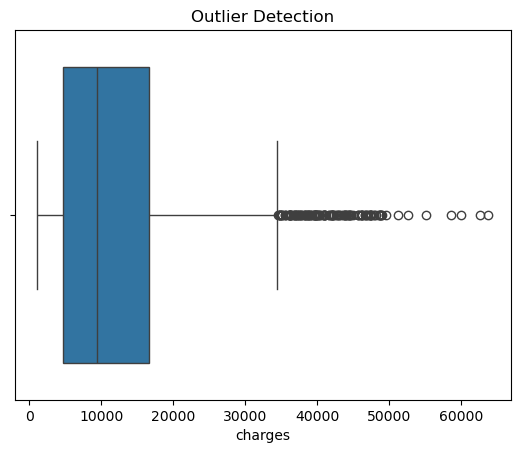

In [7]:
sns.boxplot(x=df["charges"])
plt.title("Outlier Detection")
plt.show()

In [33]:
#Statistically
q1=df["charges"].quantile(0.25)
q3=df["charges"].quantile(0.75)
iqr=q3-q1

lower=q1-1.5*iqr
upper=q3+1.5*iqr

outliers_l=df[(df["charges"]<lower)]
outliers_u=df[(df["charges"]>upper)]
print("No. of Charges which are lower",outliers_l.shape[0])
print("No. of Charges which are upper",outliers_u.shape[0])

No. of Charges which are lower 0
No. of Charges which are upper 139


In [37]:
# Z Score (Statistically)
from scipy.stats import zscore
df["zscore"]=zscore(df["charges"])
outliers_z=df[df["charges"].abs() >3]
outliers_z.shape[0]

1338

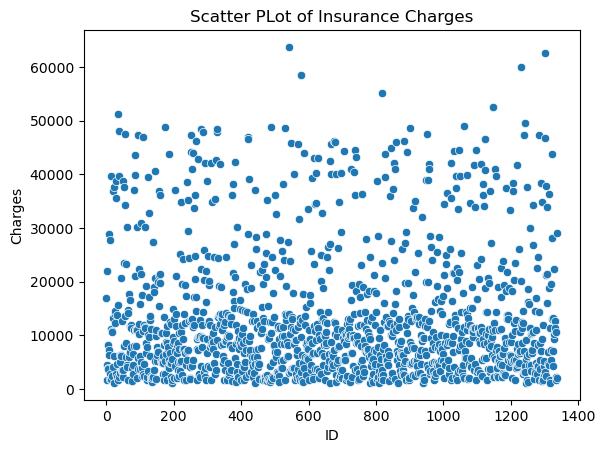

In [44]:
#scatterplot
sns.scatterplot(x=df.index,y=df["charges"])
plt.title("Scatter PLot of Insurance Charges")
plt.xlabel("ID")
plt.ylabel("Charges")
plt.show()

In [46]:
df.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest,age_group,bmi_category,zscore
0,19,1,27.900,0,1,16884.92400,0,0,1,Teen,Overweight,0.298584
1,18,0,33.770,1,0,1725.55230,0,1,0,Teen,Obese,-0.953689
2,28,0,33.000,3,0,4449.46200,0,1,0,Adults,Obese,-0.728675
3,33,0,22.705,0,0,21984.47061,1,0,0,Adults,Normal,0.719843
4,32,0,28.880,0,0,3866.85520,1,0,0,Adults,Overweight,-0.776802
